# **R Laboratory Session 04**
### *Course:* Advanced Statistics for Physics Analysis, University of Padua, A.Y. 2021/22
### *Student:* Daniele Ninni
***
## **Table of Contents**
1) [**Community Mobility Open Data**](#sec1)
2) [**Random Number Generators**](#sec2)
3) [**Bayesian Inference**](#sec3)
    - [3.A](#sec3.A)
    - [3.B](#sec3.B)
    - [3.C](#sec3.C)
4) [**Bayesian Inference**](#sec4)
    - [4.A](#sec4.A)
    - [4.B](#sec4.B)
    - [4.C](#sec4.C)
    - [4.D](#sec4.D)
***

In [1]:
# load packages
library(tidyverse)
library(lubridate)

# set plot options (global)
theme_set(theme_bw(base_size=8))
options(
    repr.plot.width=7,  # plotting area width in inches  (default:   7)
    repr.plot.height=4, # plotting area height in inches (default:   7)
    repr.plot.res=300   # PPI for rasterization          (default: 120)
)

# set random seed for reproducibility
set.seed(5)

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.8
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Caricamento pacchetto: 'lubridate'


I seguenti oggetti sono mascherati da 'package:base':

    date, intersect, setdiff, union




<a id='sec1'></a>
## **Exercise 1** - Community Mobility Open Data

Community Mobility Reports have been created with the aim to provide insights into what has changed in response to policies aimed at combating COVID-19. Data can be found at https://www.google.com/covid19/mobility/.

Download and analyze the following data sets:

- https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv
- https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip

The data show how visitors to (or time spent in) categorized places change compared to $\color{red}\text{baseline days}$. A baseline day represents a normal value for that day of the week. The baseline day is the median value from the 5-week period Jan 3 – Feb 6, 2020. To make the reports useful, categories have been used to group some of the places with similar characteristics for purposes of social distancing guidance. The following categories are available:

- $\texttt{retail\_and\_recreation}$, i.e. places like restaurants, cafes, shopping centers, theme parks, museums, libraries and movie theaters
- $\texttt{grocery\_and\_pharmacy}$, i.e. grocery markets, food warehouses, farmers markets, specialty food shops, drug stores and pharmacies
- $\texttt{parks}$, i.e. national parks, public beaches, marinas, dog parks, plazas and public gardens
- $\texttt{transit\_stations}$ i.e. all public transport hubs such as subway, bus and train stations
- $\texttt{workplaces}$, i.e. places of work
- $\texttt{residential}$, i.e. people’s residence

- ### Select a couple of European countries of your choice and analyze the trends in the previous variables over time:

  - #### produce a plot of the data by averaging the observable over a period of one week (hint: convert the data field to $\texttt{lubridate::week}$) and one month and quantify the impact of COVID-19 restrictions on mobility situations

In [2]:
global_mobility_report <- read_csv('Global_Mobility_Report.csv')
global_mobility_report

Rows: 9673060 Columns: 15
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (8): country_region_code, country_region, sub_region_1, sub_region_2, m...
dbl  (6): retail_and_recreation_percent_change_from_baseline, grocery_and_ph...
date (1): date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0,4,5,0,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1,4,4,1,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1,1,5,1,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2,1,5,0,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2,0,4,-1,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-20,-2,1,6,1,1,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-21,-3,2,6,0,-1,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-22,-2,2,4,-2,3,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-23,-1,3,3,-1,4,1


In [3]:
# define function that plots and analyzes mobility report data
f.mobility_report <- function(tbl_mobility_report, country_codes=c('IT'), averaging_period='week') {

    tbl_plot <- tbl_mobility_report %>%
                    filter(country_region_code %in% country_codes) %>%
                    mutate('{averaging_period}' := match.fun(averaging_period)(date) + 12*(year(date)-min(year(date)))) %>%
                    mutate_at(averaging_period, function(x) (x-min(x))) %>%
                    select(country_region, where(is.numeric)) %>%
                    group_by_at(c('country_region', averaging_period)) %>%
                    summarise_all(mean, na.rm=T) %>%
                    pivot_longer(!c('country_region', all_of(averaging_period)), names_to='category', values_to='percent_change_from_baseline') %>%
                    mutate(category = str_replace_all(str_remove(category, '_percent_change_from_baseline'), '_', ' '))

    p <- ggplot(data=tbl_plot, aes_string(x=averaging_period, y='percent_change_from_baseline', group='country_region', colour='country_region')) +
            geom_line(size=.3) +
            scale_x_continuous(n.breaks=14) +
            scale_y_continuous(n.breaks=9) +
            xlab(str_glue('# {averaging_period}s passed since {min(tbl_mobility_report$date)}')) +
            ylab('change from baseline (%)') +
            facet_wrap(vars(category)) +
            theme(
                legend.margin      = margin(t=-4, b=-2),
                legend.title       = element_blank(),
                legend.position    = "bottom",
                legend.box.margin  = margin(t=-5, b=-5),
                strip.background   = element_rect(fill="aliceblue"),
                strip.text         = element_text(margin=margin(t=1, b=1)))
    print(p)

    cat('Averaging period:', averaging_period)
    cat(str_glue("\n\nValues of 'percent_change_from_baseline' averaged over the time period from {min(tbl_mobility_report$date)} to {max(tbl_mobility_report$date)}:"))
    tbl_plot %>%
        group_by(country_region, category) %>%
        summarise(mean=mean(percent_change_from_baseline), .groups='drop_last') %>%
        pivot_wider(names_from=category, values_from=mean)
        
}

Averaging period: week
Values of 'percent_change_from_baseline' averaged over the time period from 2020-02-15 to 2022-04-27:

country_region,grocery and pharmacy,parks,residential,retail and recreation,transit stations,workplaces
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
France,8.68609640,39.34305,6.730807,-16.583283,-6.043978,-22.44506
Germany,6.01256658,56.38500,6.614441,-18.000973,-19.969091,-18.77820
Luxembourg,0.02804256,28.11079,9.318489,-23.550589,-20.289120,-25.89549
Malta,6.14359345,15.89099,6.956381,-7.084689,-10.775990,-18.35909


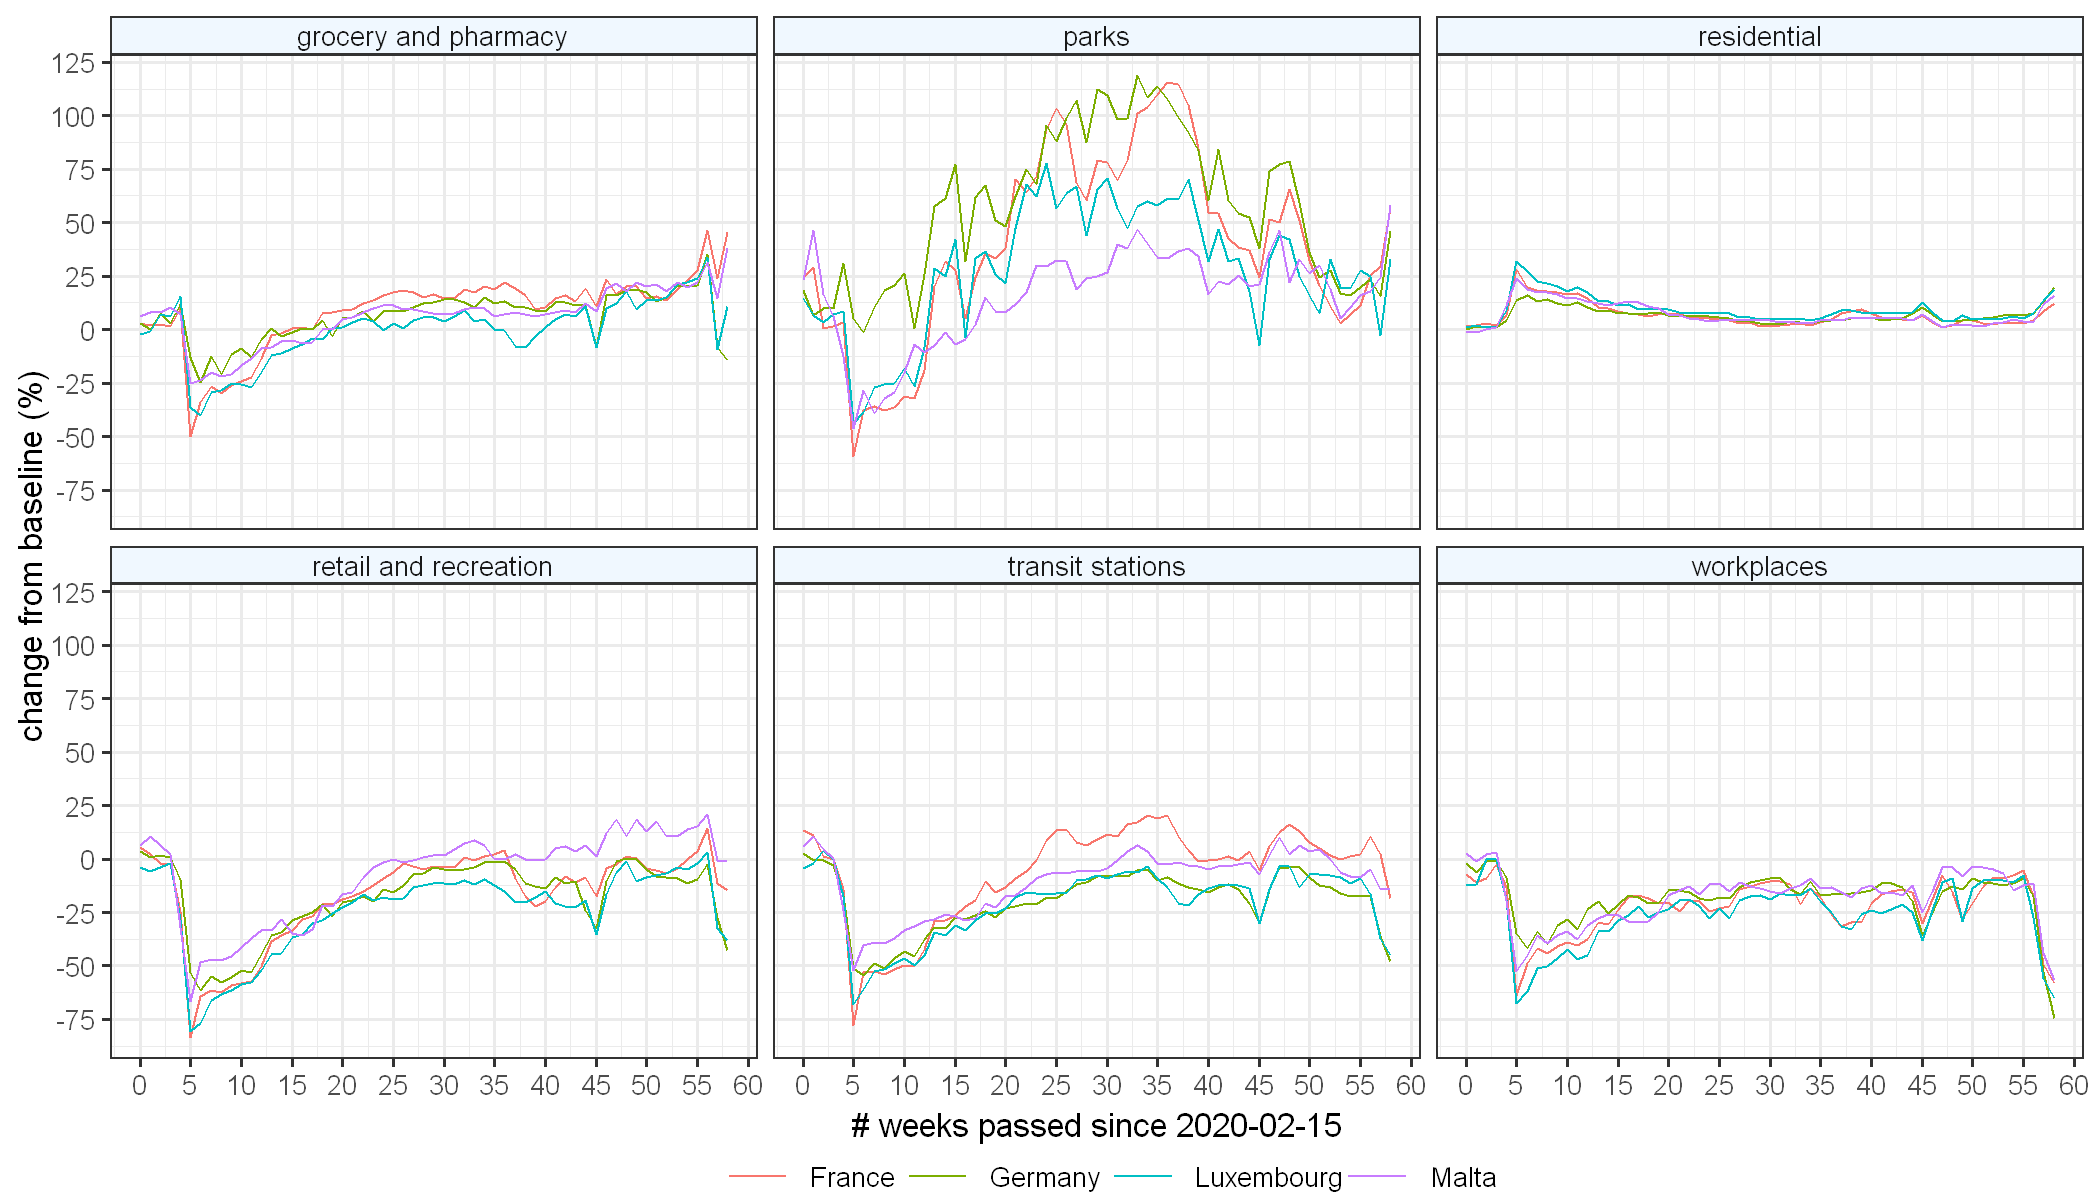

Averaging period: month
Values of 'percent_change_from_baseline' averaged over the time period from 2020-02-15 to 2022-04-27:

country_region,grocery and pharmacy,parks,residential,retail and recreation,transit stations,workplaces
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
France,8.180899,48.05654,6.527324,-16.644793,-4.922801,-21.79104
Germany,5.771805,64.53329,6.280180,-18.035711,-19.586914,-17.84429
Luxembourg,-1.095071,34.61857,9.033541,-23.724552,-19.777786,-25.45022
Malta,4.659377,17.18633,6.854733,-8.179025,-10.983792,-18.07979


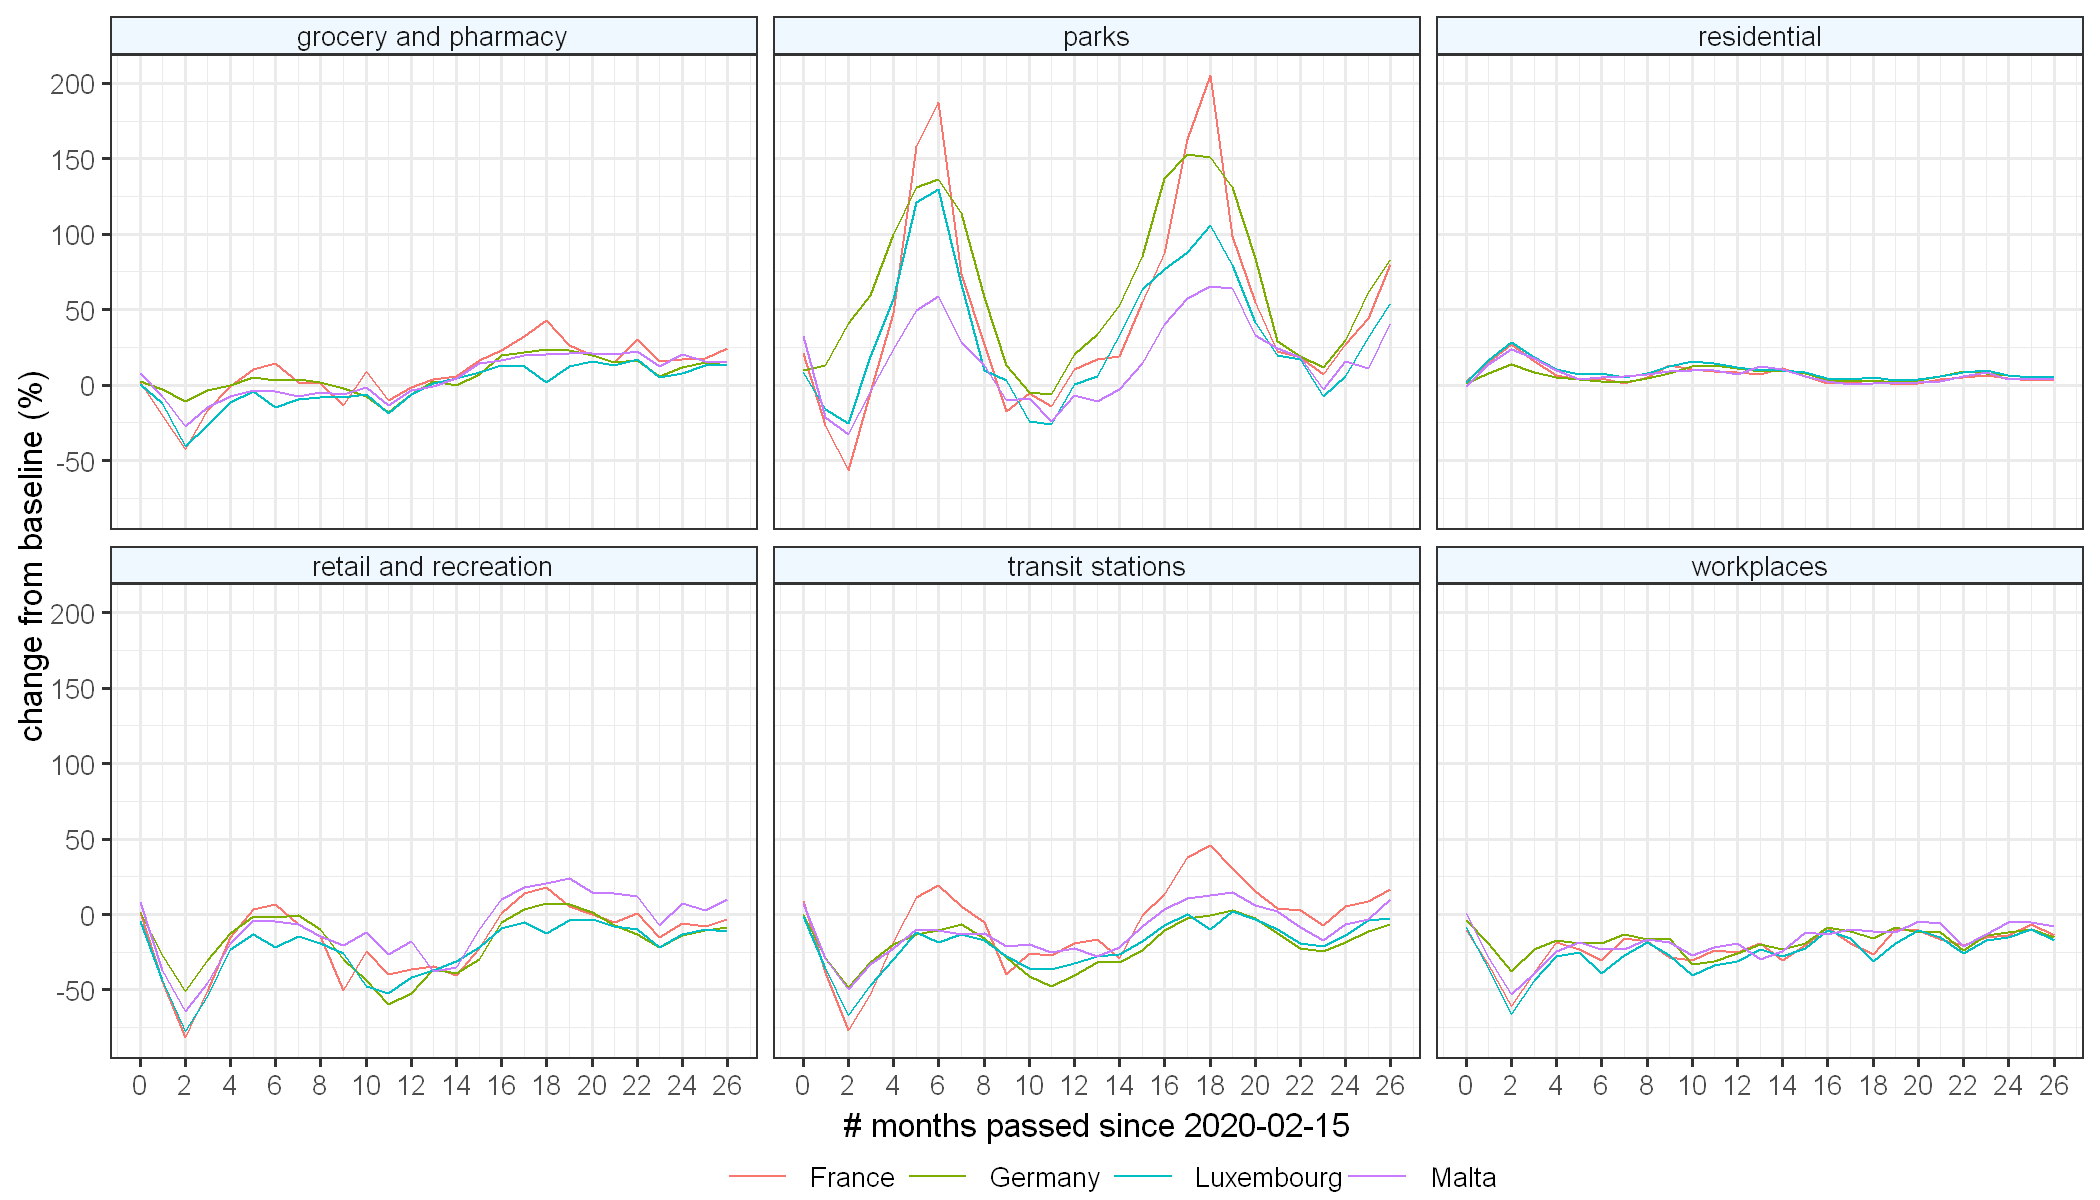

In [4]:
country_codes <- c('DE', 'FR', 'LU', 'MT')
f.mobility_report(global_mobility_report, country_codes=country_codes, averaging_period='week')
f.mobility_report(global_mobility_report, country_codes=country_codes, averaging_period='month')

Averaging period: week
Values of 'percent_change_from_baseline' averaged over the time period from 2020-02-15 to 2022-04-27:

country_region,grocery and pharmacy,parks,residential,retail and recreation,transit stations,workplaces
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Estonia,10.130382,24.94204,4.927731,-6.229153,-11.19992,-19.45520
Italy,2.654818,27.94502,7.478361,-19.298815,-21.70895,-22.45746
Latvia,5.445314,21.20905,6.642886,-17.973534,-22.01245,-26.45434
Spain,3.044890,13.15285,5.985369,-23.806009,-15.94486,-21.24519


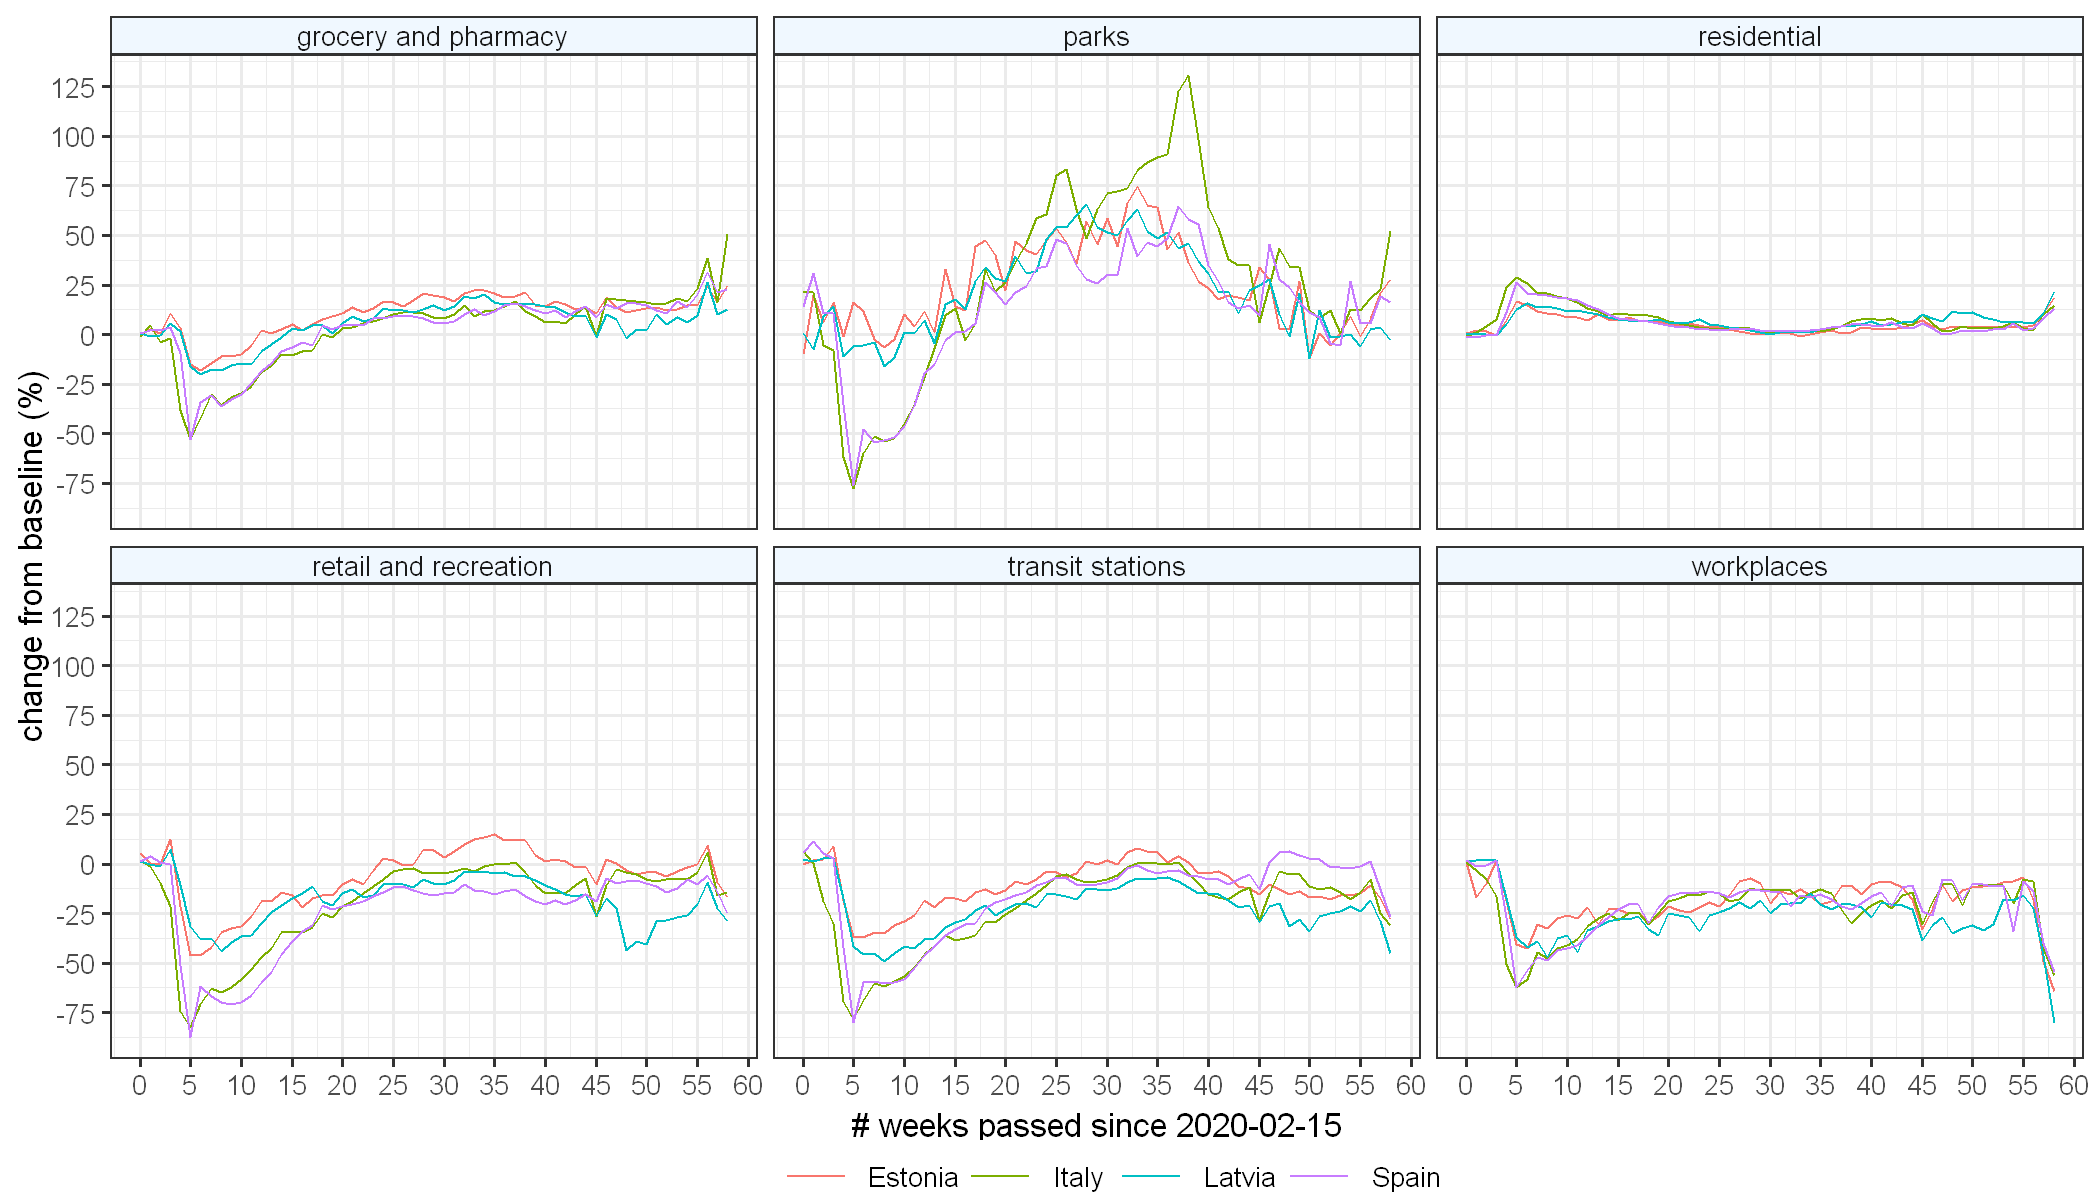

Averaging period: month
Values of 'percent_change_from_baseline' averaged over the time period from 2020-02-15 to 2022-04-27:

country_region,grocery and pharmacy,parks,residential,retail and recreation,transit stations,workplaces
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Estonia,10.664954,37.59397,4.333567,-4.970229,-9.277265,-19.32282
Italy,1.899589,36.42104,6.909597,-18.423335,-20.297502,-21.48909
Latvia,6.481923,29.54531,5.675916,-15.301986,-20.330845,-25.71891
Spain,2.582283,17.14258,5.673640,-23.717472,-16.235832,-20.50635


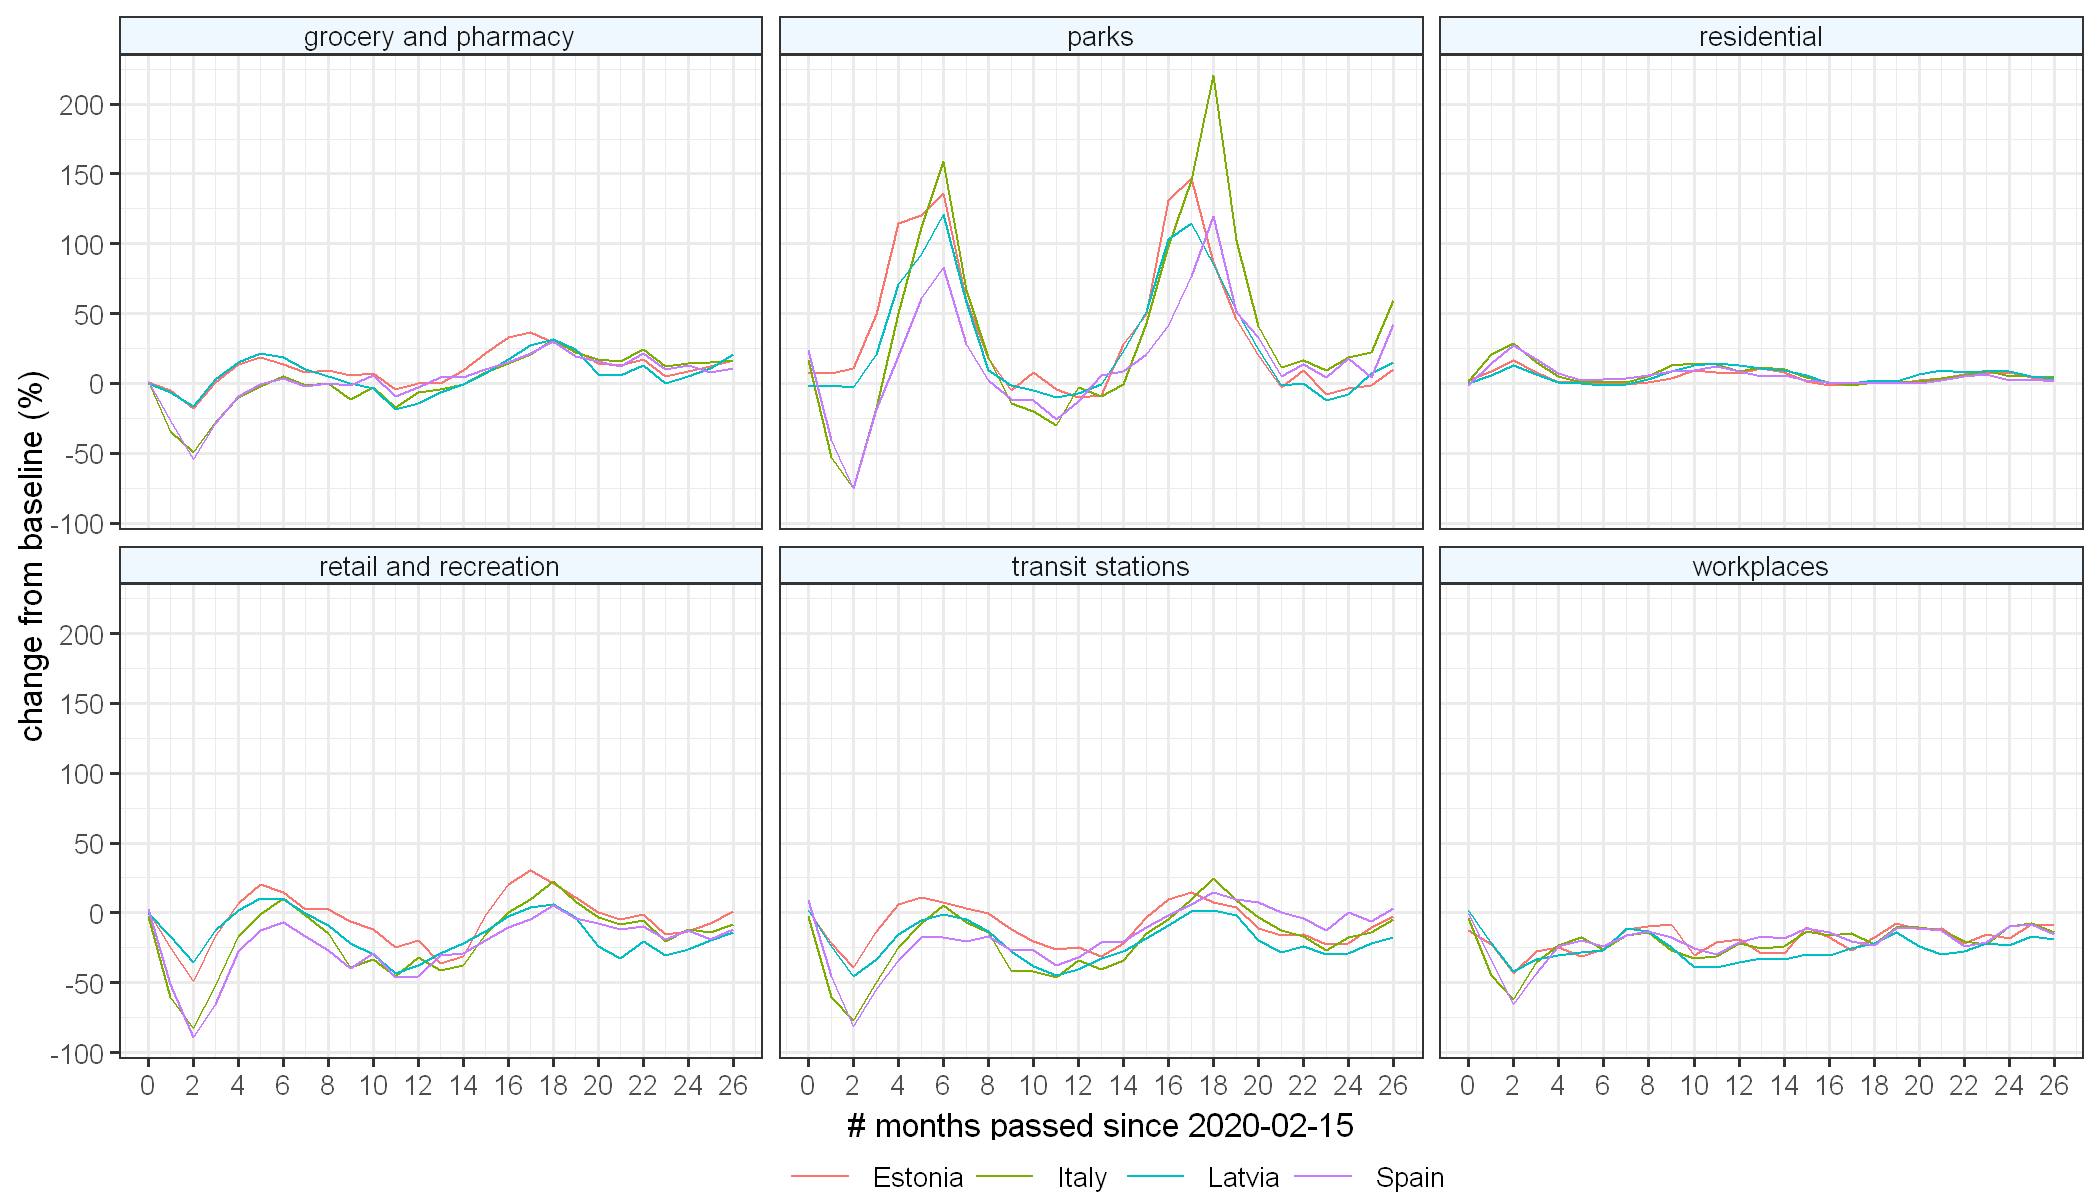

In [5]:
country_codes <- c('IT', 'ES', 'LV', 'EE')
f.mobility_report(global_mobility_report, country_codes=country_codes, averaging_period='week')
f.mobility_report(global_mobility_report, country_codes=country_codes, averaging_period='month')

<a id='sec2'></a>
## **Exercise 2** - Random Number Generators

One of the first random number generator was proposed by von Neumann, the so-called *middle square* algorithm.

- ### Write R code to implement this type of generator and, given a fixed digit number input, square it and remove the leading and trailing digits in order to return a number with the same number of digits as the original number

  *Suggestion:* after having squared the number, convert it to a list of characters

  $(\texttt{number <- unlist(strsplit(as.character(x.squared), ""))})$

  and, after having removed the head and tail of the list, convert it back to a number

  $(\texttt{as.numeric(paste(number.after.trimming, collapse=""))})$

In [6]:
prng_middle_square <- function (seed=5772156649, N=100) {

    seed       <- round(seed)
    seed       <- abs(seed)
    n_digits   <- nchar(seed)                # number of digits of the pseudorandom numbers to generate
    n_digits   <- n_digits + (n_digits %% 2) # 'n_digits' must be even for the middle-square method to work!
    pr_numbers <- rep(NA, N)                 # output vector containing the generated pseudorandom numbers
    i          <- 0                          # counter
    x          <- seed

    while ((i <= N) & !(x %in% pr_numbers) & (x != 0) & (nchar(x) == n_digits | i == 0)) {

        # store the last generated number in 'pr_numbers'
        i             <- i + 1
        pr_numbers[i] <- x

        # generate a new number
        x <- x^2
        x <- as.character(x)
        x <- str_pad(x, width=2*n_digits, side='left', pad='0')
        x <- str_sub(x, start=1+(nchar(x)-n_digits)/2, end=-1-(nchar(x)-n_digits)/2)
        x <- as.numeric(x)

    }

    pr_numbers <- pr_numbers[!is.na(pr_numbers)] # keep only successfully generated numbers in 'pr_numbers'
    pr_numbers <- pr_numbers[-1]                 # remove the seed from 'pr_numbers'

    if (length(pr_numbers) != N) {

        if (length(pr_numbers) == 0) cat('It has not been possible to generate any pseudorandom number!\nReason: ')
        else                         cat(str_glue('It has been possible to generate only {length(pr_numbers)} pseudorandom numbers instead of {N}!\nReason: '))

        if      (x %in% pr_numbers)   cat('the next pseudorandom number would have been a repetition of an already generated one')
        else if (x == 0)              cat('the next pseudorandom number would have been 0')
        else if (nchar(x) < n_digits) cat("the next pseudorandom number's number of digits would have been less than the (padded if odd) seed's number of digits")
        else if (nchar(x) > n_digits) cat("the next pseudorandom number's number of digits would have been greater than the (padded if odd) seed's number of digits")
        else                          cat('the middle-square method gets stuck on the chosen seed forever')

    }

    return(pr_numbers)

}

In [7]:
prng_middle_square(seed=5772156649, N=100)

It has been possible to generate only 13 pseudorandom numbers instead of 100!
Reason: the next pseudorandom number's number of digits would have been less than the (padded if odd) seed's number of digits

[1] 7923805949 7007174077 4885453808 6589101017 2522122304 1009163342
 [7] 4106508366 6341096002 4985065803 8508810602 8578607075 4993472400
[13] 7666095617

In [8]:
prng_middle_square(seed=3792, N=100)

It has not been possible to generate any pseudorandom number!
Reason: the middle-square method gets stuck on the chosen seed forever

numeric(0)

In [9]:
prng_middle_square(seed=675248, N=100)

It has been possible to generate only 33 pseudorandom numbers instead of 100!
Reason: the next pseudorandom number's number of digits would have been less than the (padded if odd) seed's number of digits

[1] 959861 333139 981593 524817 432883 387691 304311 605184 247673 341914
[11] 905183 356263 923325 529055 899193 548051 359898 526570 275964 156129
[21] 376264 574597 161712 150770 731592 226854 462737 125531 758031 610996
[31] 316112 926796 950825

In [10]:
prng_middle_square(seed=99, N=100)

It has been possible to generate only 3 pseudorandom numbers instead of 100!
Reason: the next pseudorandom number would have been a repetition of an already generated one

[1] 80 40 60

<a id='sec3'></a>
## **Exercise 3** - Bayesian Inference

A publishing company has recently launched a new journal. In order to determine how effective it is in reaching its possible audience, a market survey company selects a random sample of people from a possible target audience and interviews them. Out of 150 interviewed people, 29 have read the latest issue of the journal.

<a id='sec3.A'></a>
### **3.A** What kind of distribution would you assume for $y$, the number of people who have read the latest issue of the journal?

The single interview is an example of a **Bernoulli trial**, i.e., a random experiment with exactly two possible outcomes, ***success*** with probability $p$ and ***failure*** with probability $q = 1-p$.

In the context of this exercise, the two possible outcomes can be defined as follows:

- ***success*** : the interviewee has read the latest issue of the journal
- ***failure*** : the interviewee has NOT read the latest issue of the journal

Consequently, the whole interview campaign is an example of a **Bernoulli process**, i.e., a sequence of $n$ independent identically distributed Bernoulli trials, each with a probability of success $p$.

The probability of exactly $k$ successes in a Bernoulli process is given by the **binomial distribution**:

$
P(k \mid p,n) = \binom{n}{k} p^k q^{n-k}
$

Therefore, it is reasonable to assume that $y$, i.e. the number of people who have read the latest issue of the journal, has a binomial distribution with the following parameters:

- $n = 150$
- $p = \frac{29}{150}$
- $q = 1-p = \frac{121}{150}$

<a id='sec3.B'></a>
### **3.B** Assuming a uniform prior, what is the posterior distribution for $y$?

Bayes' theorem shows that:

$
\text{posterior} \propto \text{likelihood} \cdot \text{prior}
$

In the context of this exercise, assume that:

- ***prior*** : uniform distribution 
$
P(p \mid \mathcal{M}) = \mathcal{U}(0,1) = Beta(\alpha = 1, \beta = 1)
$

- ***likelihood*** : binomial distribution
$
P(k \mid p,n,\mathcal{M}) = B(n = 150, p = 29/150)
$

Recall that, in general, the beta prior is a **conjugate prior** for the binomial likelihood.

In other words, given a beta prior $Beta(\alpha_p, \beta_p)$ and a binomial likelihood $B(n,p)$, the prior and posterior are **conjugate distributions**.

Quantitatively, if $k$ is the number of successes, the posterior is a beta distribution $Beta(\alpha, \beta)$ with the following parameters:

$
\alpha = \alpha_p + k
$

$
\beta = \beta_p + n - k
$

In the context of this exercise:

- $\alpha_p = \beta_p = 1$
- $n = 150$
- $k = 29$

Therefore, the ***posterior*** distribution for $y$ is the following beta distribution:

$
P(p \mid k,n,\mathcal{M}) = Beta(\alpha = 30, \beta = 122)
$

<a id='sec3.C'></a>
### **3.C** Plot both posterior and likelihood distribution functions

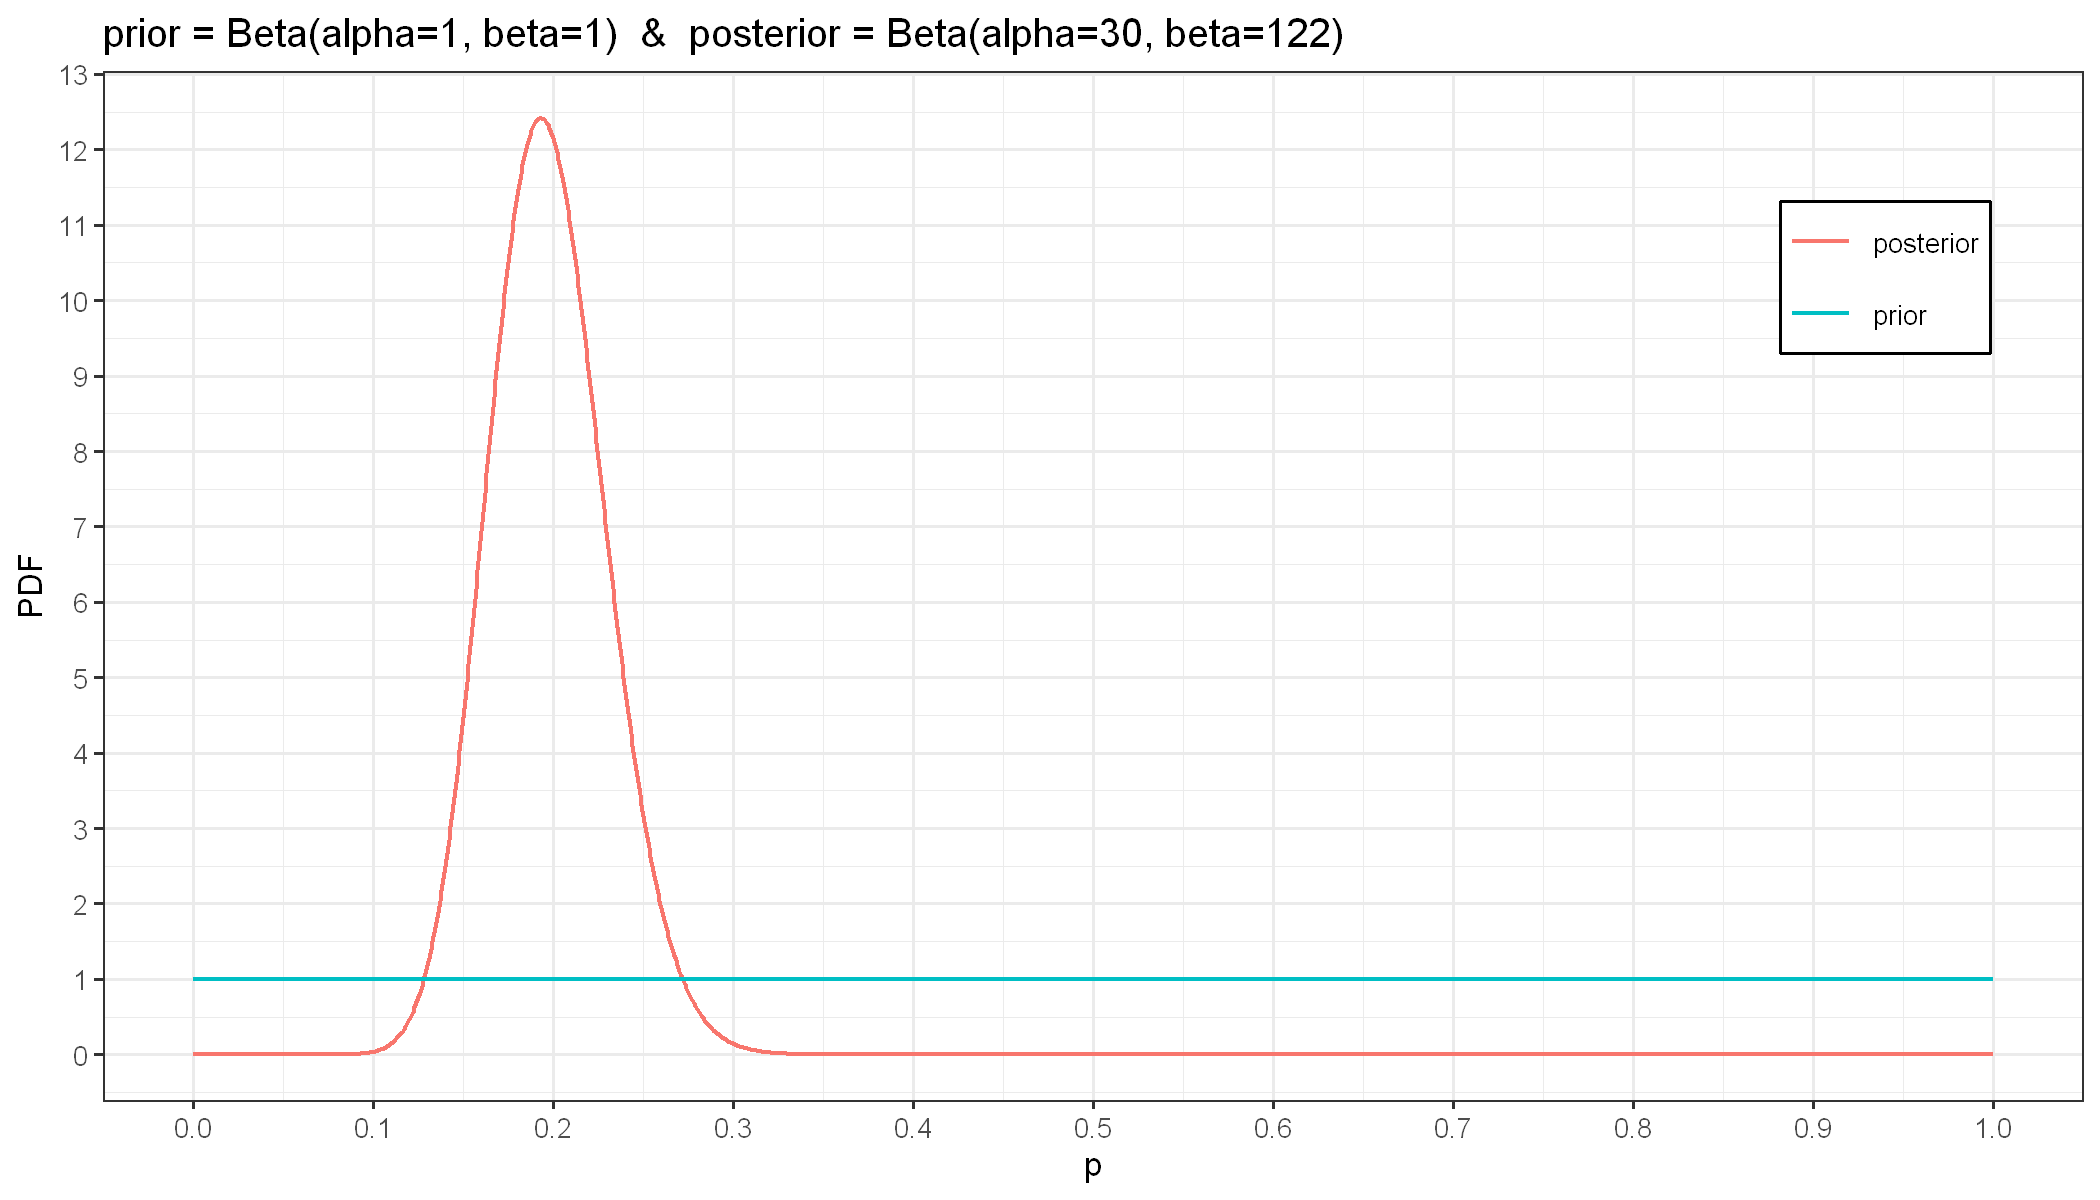

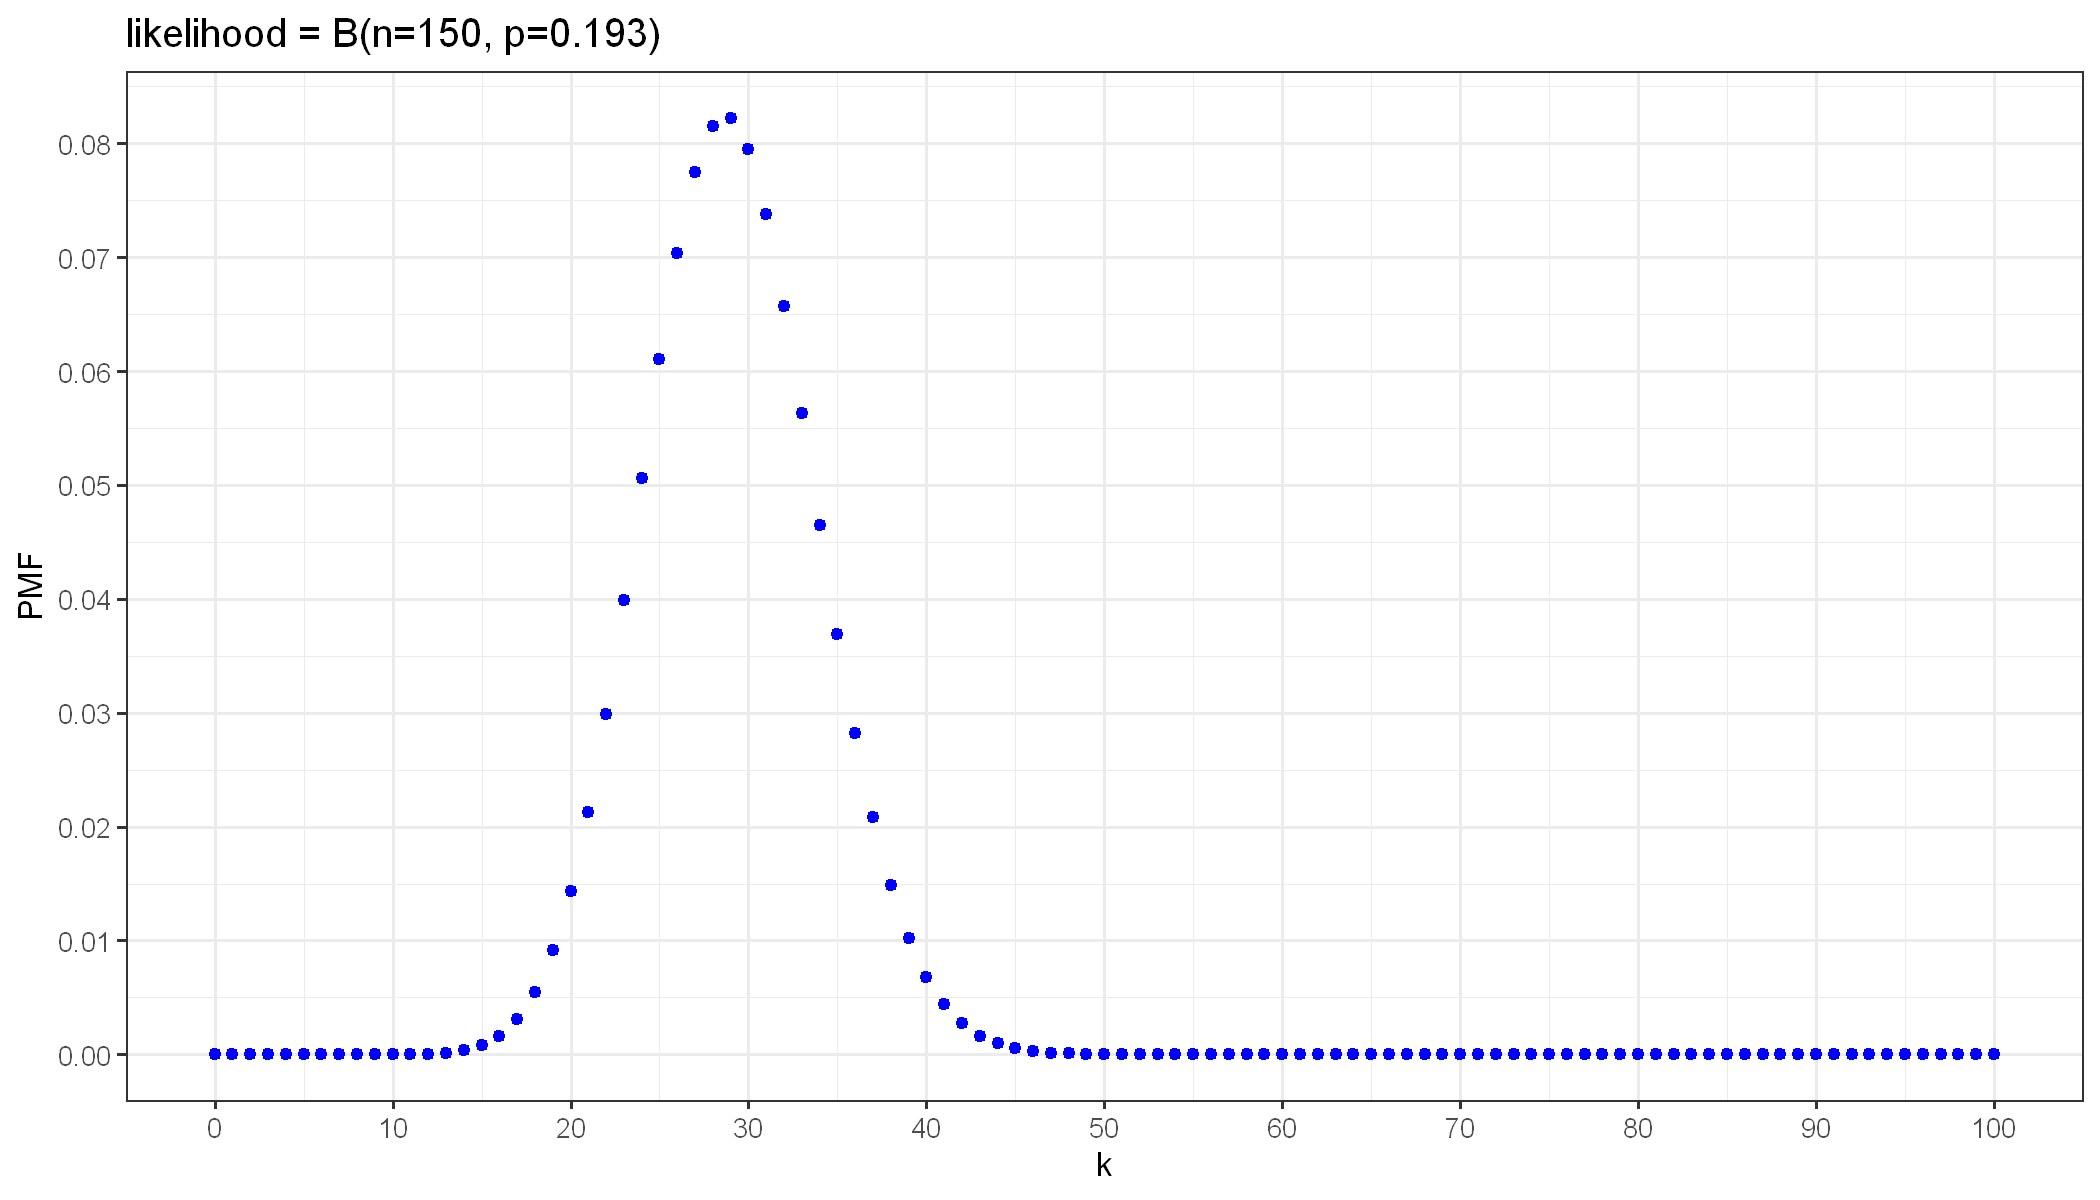

In [11]:
# prior
alpha_p <- 1
beta_p  <- 1
p       <- seq(from=0, to=1, length=10^3)
prior   <- dbeta(x=p, shape1=alpha_p, shape2=beta_p)

# likelihood
n          <- 150
prob       <- 29 / 150
k          <- seq(from=0, to=10^2)
likelihood <- dbinom(x=k, size=n, prob=prob)

# posterior
alpha     <- alpha_p + 29
beta      <- beta_p + 150 - 29
posterior <- dbeta(x=p, shape1=alpha, shape2=beta)

# plot prior & posterior
ggplot(data=tibble(p, prior, posterior) %>% pivot_longer(!p, names_to='type', values_to='PDF'), aes(x=p, y=PDF, group=type, colour=type)) +
    geom_line() +
    scale_x_continuous(n.breaks=11) +
    scale_y_continuous(n.breaks=14) +
    ggtitle(str_glue('prior = Beta(alpha={alpha_p}, beta={beta_p})  &  posterior = Beta(alpha={alpha}, beta={beta})')) +
    theme(
        legend.background = element_rect(colour='black'),
        legend.margin     = margin(t=-3, r=6, b=1, l=1),
        legend.title      = element_blank(),
        legend.position   = c(.9, .8))

# plot likelihood
ggplot() +
    geom_point(aes(x=k, y=likelihood), colour='blue', size=1) +
    scale_x_continuous(n.breaks=11) +
    scale_y_continuous(n.breaks=9) +
    ylab('PMF') +
    ggtitle(str_glue('likelihood = B(n={n}, p={round(prob, 3)})'))

<a id='sec4'></a>
## **Exercise 4** - Bayesian Inference

A coin is flipped $n = 30$ times with the following outcomes:

$\texttt{T, T, T, T, T, H, T, T, H, H, T, T, H, H, H, T, H, T, H, T, H, H, T, H, T, H, T, H, H, H}$

<a id='sec4.A'></a>
### **4.A** Assuming a flat prior and a beta prior, plot the likelihood, prior and posterior distributions for the data set

In [12]:
flips   <- c(0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1) # tail : 0 , head : 1

n_samples <- 10^4
p         <- seq(from=0, to=1, length=n_samples)

# binomial likelihood
n_flips      <- length(flips)
n_heads      <- sum(flips)
f.likelihood <- function(p) {dbinom(x=n_heads, size=n_flips, prob=p) / integrate(dbinom, lower=0, upper=1, x=n_heads, size=n_flips)$value}
likelihood   <- f.likelihood(p)

# uniform prior
prior_unif.alpha <- 1
prior_unif.beta  <- 1
f.prior_unif     <- function(p) dbeta(x=p, shape1=prior_unif.alpha, shape2=prior_unif.beta)
prior_unif       <- f.prior_unif(p)

# beta prior
prior_beta.alpha <- 10
prior_beta.beta  <- 10
f.prior_beta     <- function(p) dbeta(x=p, shape1=prior_beta.alpha, shape2=prior_beta.beta)
prior_beta       <- f.prior_beta(p)

# posterior (uniform prior)
f.posterior_unif <- function(p) dbeta(x=p, shape1=prior_unif.alpha+n_heads, shape2=prior_unif.beta+n_flips-n_heads)
posterior_unif   <- f.posterior_unif(p)

# posterior (beta prior)
f.posterior_beta <- function(p) dbeta(x=p, shape1=prior_beta.alpha+n_heads, shape2=prior_beta.beta+n_flips-n_heads)
posterior_beta   <- f.posterior_beta(p)

# arrange results in tibble 'flips_tbl'
flips_tbl <- tibble(p, 'likelihood_unif'=likelihood, 'likelihood_beta'=likelihood, prior_unif, prior_beta, posterior_unif, posterior_beta) %>%
                pivot_longer(!p, names_to=c('prob_type', 'prior_type'), names_sep='_', values_to='density')
flips_tbl

p,prob_type,prior_type,density
<dbl>,<chr>,<chr>,<dbl>
0.00000000,likelihood,unif,0.000000e+00
0.00000000,likelihood,beta,0.000000e+00
0.00000000,prior,unif,1.000000e+00
0.00000000,prior,beta,0.000000e+00
0.00000000,posterior,unif,0.000000e+00
0.00000000,posterior,beta,0.000000e+00
0.00010001,likelihood,unif,4.808642e-51
0.00010001,likelihood,beta,4.808642e-51
0.00010001,prior,unif,1.000000e+00


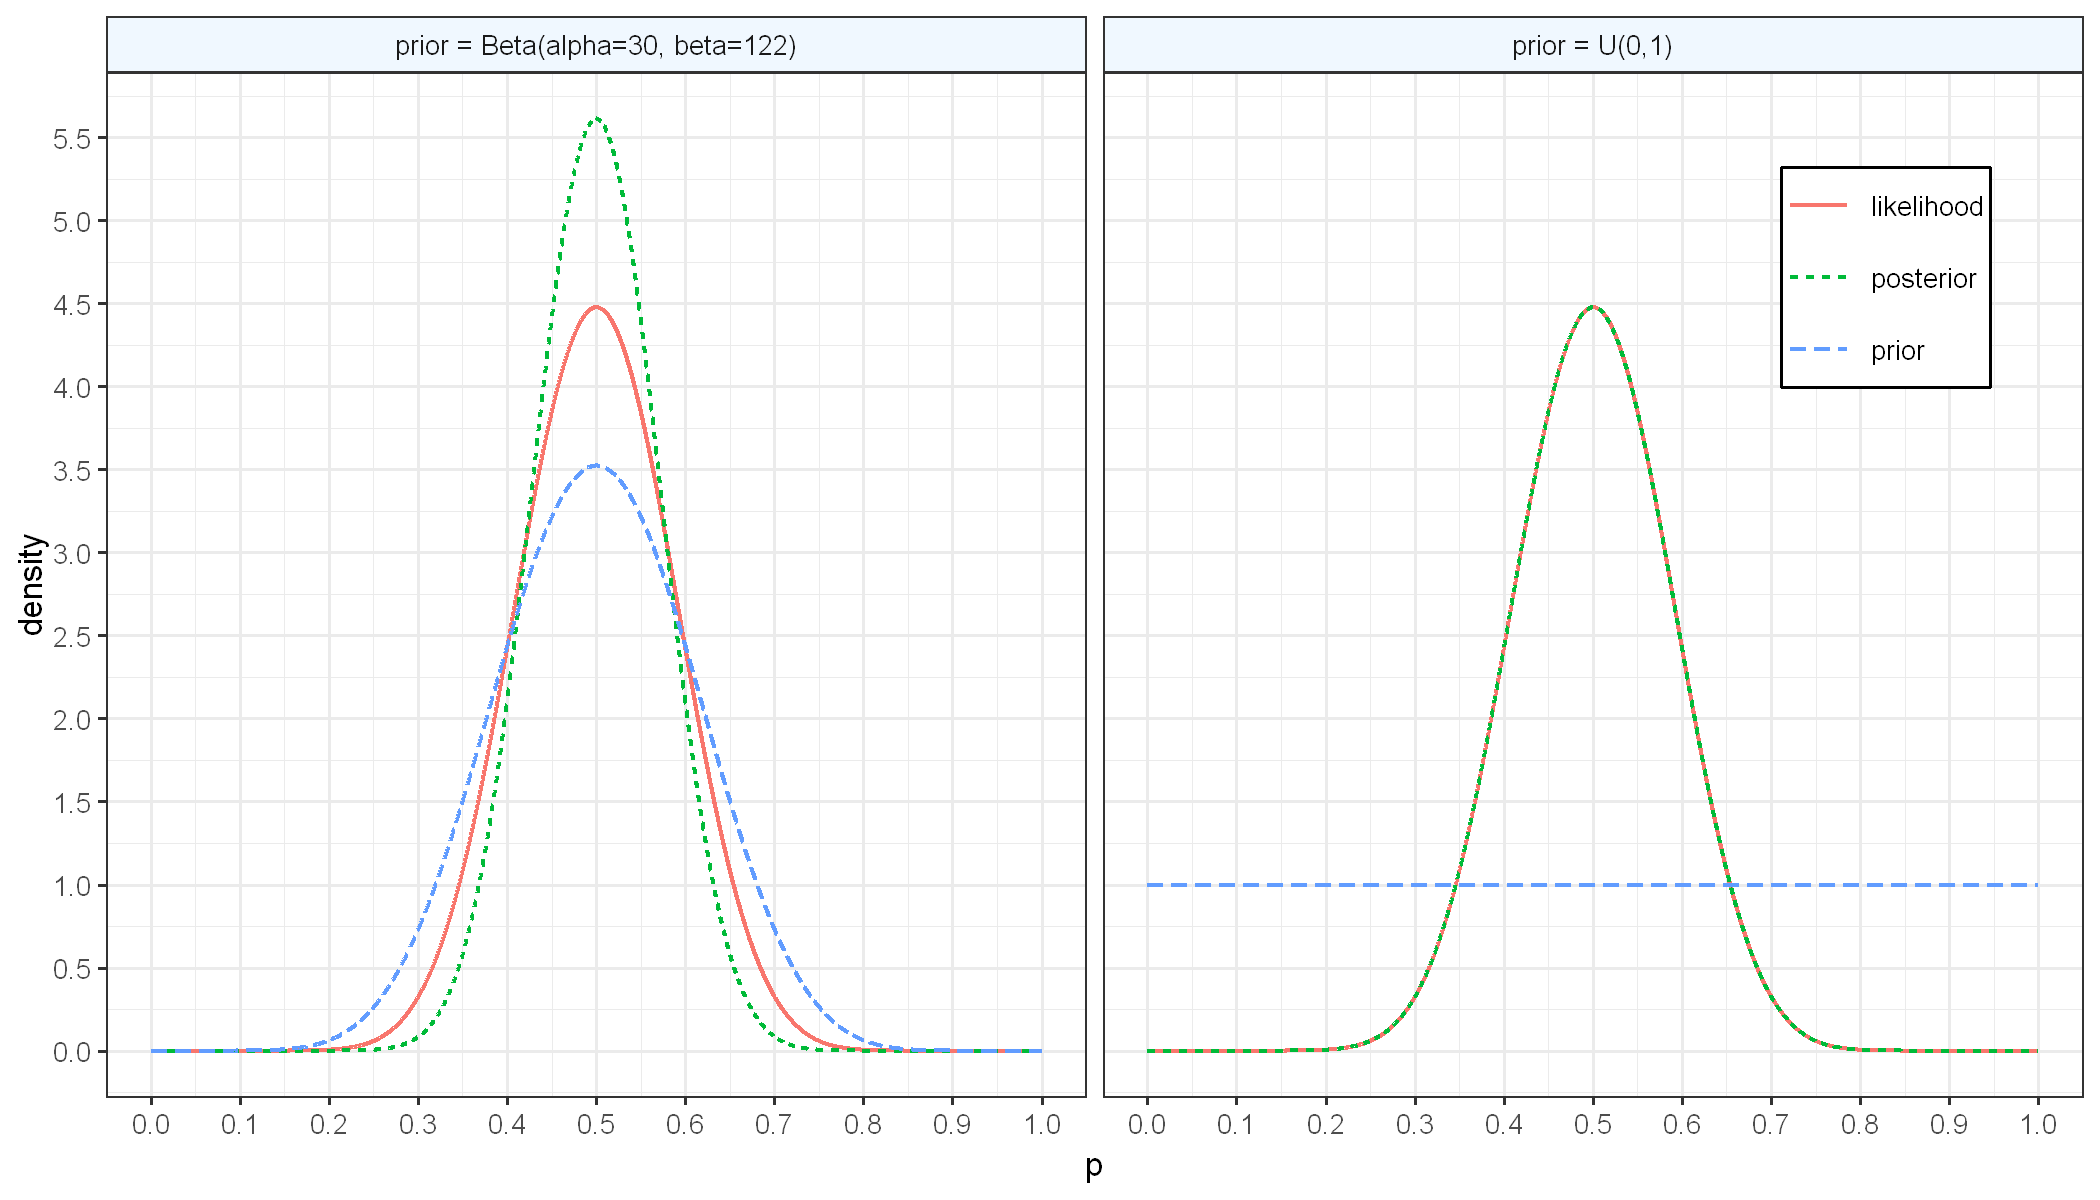

In [13]:
# plot probabilities
ggplot(data=flips_tbl, aes(x=p, y=density, group=prob_type, colour=prob_type, linetype=prob_type)) +
    geom_line() +
    scale_x_continuous(n.breaks=11) +
    scale_y_continuous(n.breaks=12) +
    facet_wrap(vars(prior_type), labeller=as_labeller(c(unif='prior = U(0,1)', beta=str_glue('prior = Beta(alpha={alpha}, beta={beta})')))) +
    theme(
        legend.background = element_rect(colour='black'),
        legend.margin     = margin(t=-3.5, r=6.5, b=.5, l=.5),
        legend.title      = element_blank(),
        legend.position   = c(.9, .8),
        strip.background  = element_rect(fill="aliceblue"))

<a id='sec4.B'></a>
### **4.B** Evaluate the most probable value for the coin probability $p$ and, integrating the posterior probability distribution, give an estimate for a 95% credible interval

In [14]:
# define function that evaluates most probable value of 'p'
mpv <- function(p, probability, precision=3) round(p[which.max(probability)], precision)

# define function that estimates credible interval
credible_interval <- function(f.posterior, level=.95, delta.p=10^-5) {

    integral <- 0
    lower    <- 0
    while (integral < (1-level)/2) {
        integral <- integral + integrate(f.posterior, lower=lower, upper=lower+delta.p)$value
        lower    <- lower + delta.p
    }

    integral <- 0
    upper    <- 1
    while (integral < (1-level)/2) {
        integral <- integral + integrate(f.posterior, lower=upper-delta.p, upper=upper)$value
        upper    <- upper - delta.p
    }

    return(c(lower, upper))

}

# evaluate most probable value of 'p'
unif.mpv <- mpv(p, posterior_unif)
beta.mpv <- mpv(p, posterior_beta)

# estimate credible intervals
level <- .95
unif.cred_int <- credible_interval(f.posterior_unif, level=level)
beta.cred_int <- credible_interval(f.posterior_beta, level=level)

# arrange results regarding one-step analysis in tibble 'one.step_tbl'
one.step_tbl <- tibble(
    prior_type = c('unif', 'beta'),
    mpv        = c(unif.mpv, beta.mpv),
    lower      = c(unif.cred_int[1], beta.cred_int[1]),
    upper      = c(unif.cred_int[2], beta.cred_int[2]))
one.step_tbl

prior_type,mpv,lower,upper
<chr>,<dbl>,<dbl>,<dbl>
unif,0.5,0.33061,0.66939
beta,0.5,0.36338,0.63662


In [15]:
# arrange results regarding position w.r.t. credible interval in tibble 'cred_int_tbl'
cred_int_tbl <- flips_tbl %>%
                    filter(prob_type=='posterior') %>%
                    mutate(lower=ifelse(prior_type=='unif', unif.cred_int[1], beta.cred_int[1])) %>%
                    mutate(upper=ifelse(prior_type=='unif', unif.cred_int[2], beta.cred_int[2])) %>%
                    mutate(position=ifelse(p < lower, 'before', ifelse(p > upper, 'after', 'within'))) %>%
                    select(!c(lower, upper))
cred_int_tbl

p,prob_type,prior_type,density,position
<dbl>,<chr>,<chr>,<dbl>,<chr>
0.00000000,posterior,unif,0.000000e+00,before
0.00000000,posterior,beta,0.000000e+00,before
0.00010001,posterior,unif,4.808642e-51,before
0.00010001,posterior,beta,1.580132e-81,before
0.00020002,posterior,unif,1.573334e-46,before
0.00020002,posterior,beta,2.644666e-74,before
0.00030003,posterior,unif,6.879201e-44,before
0.00030003,posterior,beta,4.441384e-70,before
0.00040004,posterior,unif,5.140050e-42,before


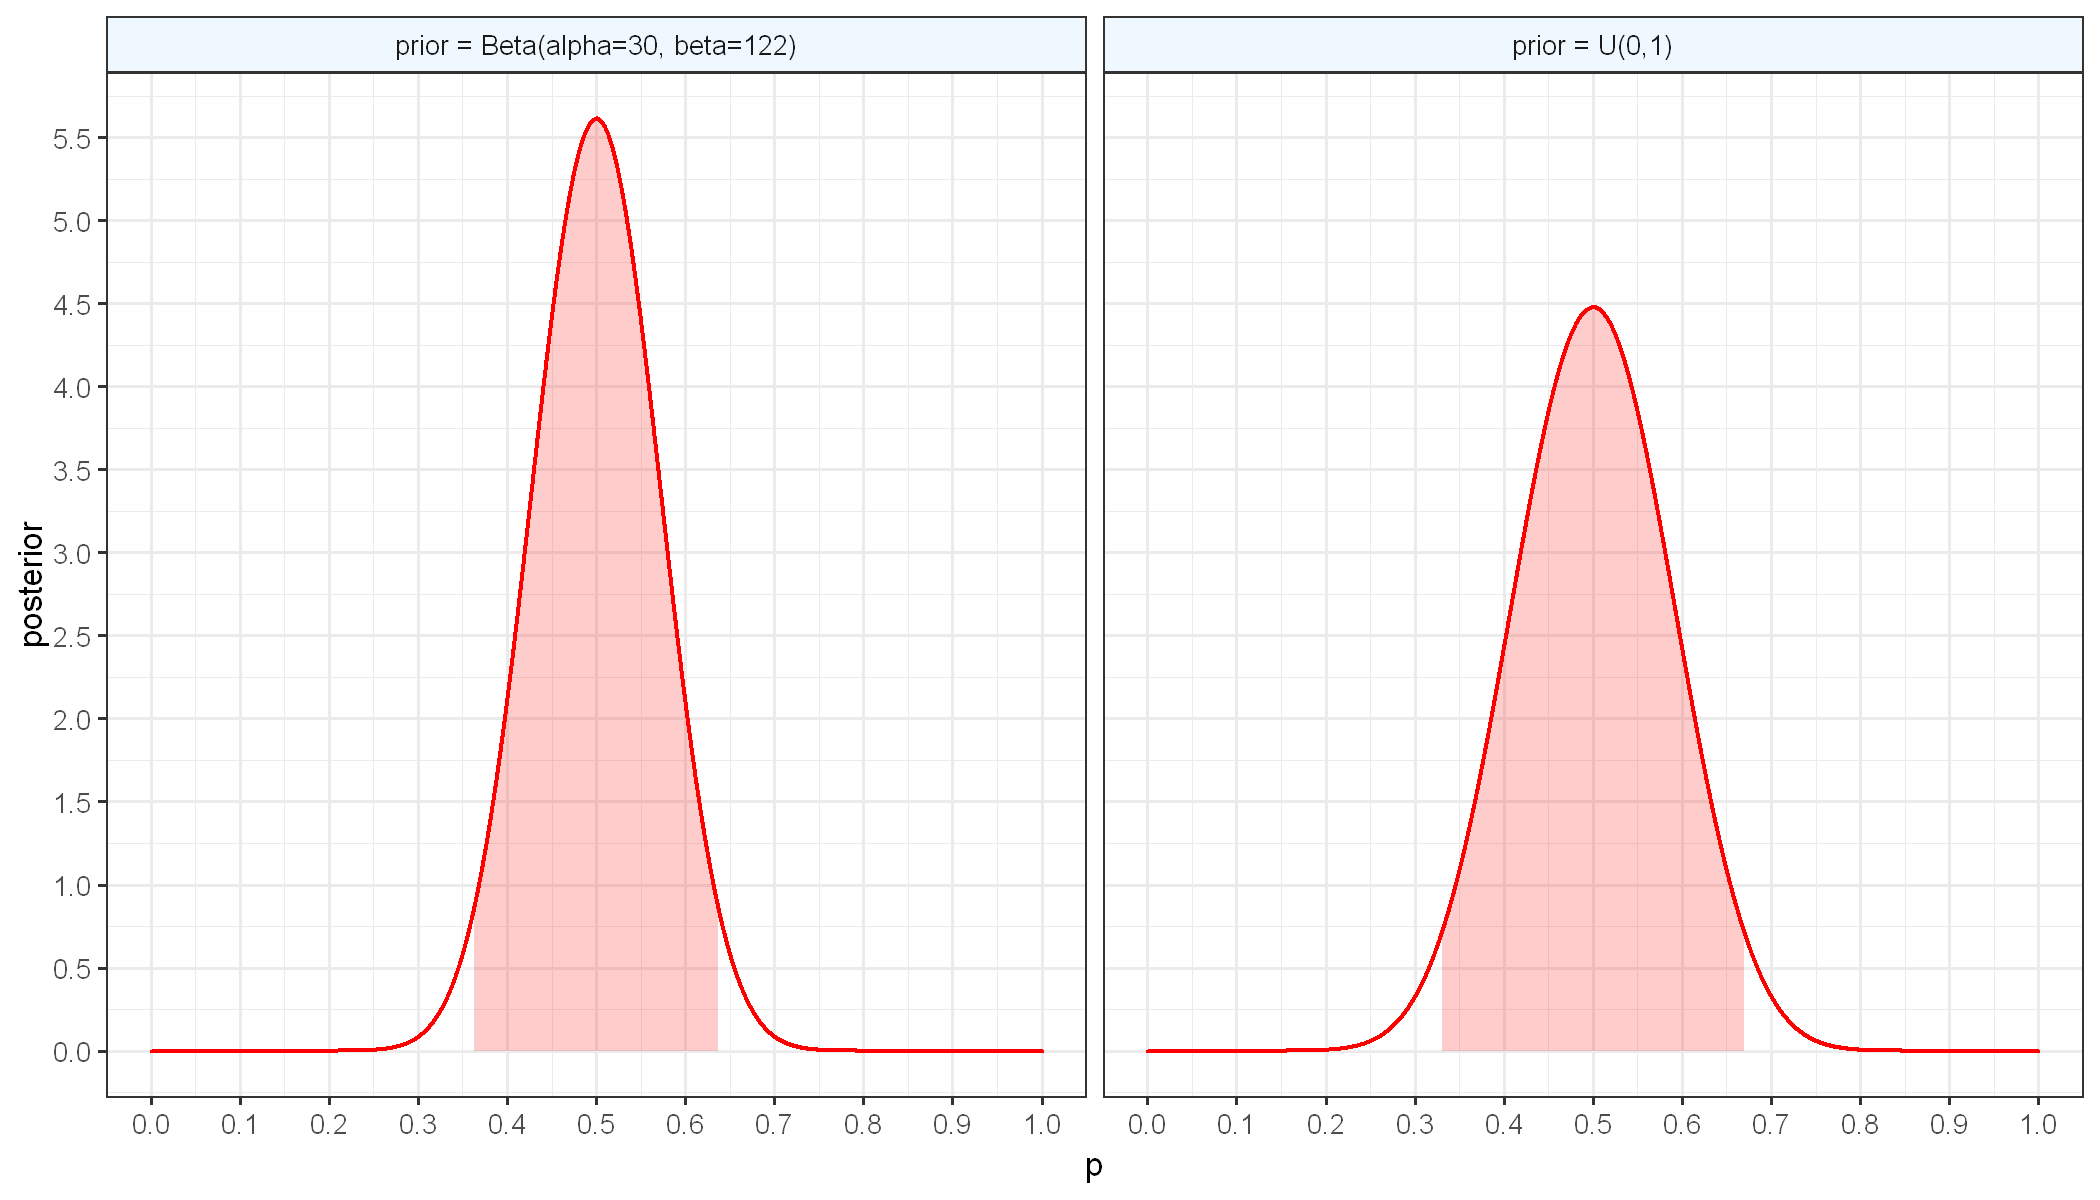

In [16]:
# plot credible intervals
ggplot(data=cred_int_tbl, aes(x=p, y=density, colour=prior_type, fill=position)) +
    geom_area(alpha=.2) +
    scale_colour_manual(values=c('red', 'red'), guide=guide_none()) +
    scale_fill_manual(values=c('white', 'white', 'red'), guide=guide_none()) +
    scale_x_continuous(n.breaks=11) +
    scale_y_continuous(n.breaks=12) +
    ylab('posterior') +
    facet_wrap(vars(prior_type), labeller=as_labeller(c(unif='prior = U(0,1)', beta=str_glue('prior = Beta(alpha={alpha}, beta={beta})')))) +
    theme(
        legend.background = element_rect(colour='black'),
        legend.margin     = margin(t=-3.5, r=6.5, b=.5, l=.5),
        legend.title      = element_blank(),
        legend.position   = c(.9, .8),
        strip.background  = element_rect(fill="aliceblue"))

<a id='sec4.C'></a>
### **4.C** Repeat the same analysis assuming a sequential analysis of the data. Show how the most probable value and the credible interval change as a function of the number of coin tosses (i.e. from 1 to 30)

In [17]:
unif_mpv   <- rep(NA, n_flips)
unif_lower <- rep(NA, n_flips)
unif_upper <- rep(NA, n_flips)
beta_mpv   <- rep(NA, n_flips)
beta_lower <- rep(NA, n_flips)
beta_upper <- rep(NA, n_flips)

# perform sequential analysis of the data
for (i in 1:length(flips)) {

    n_flips <- 1
    n_heads <- flips[i]

    # posterior (uniform prior)
    posterior_unif <- f.posterior_unif(p)

    # posterior (beta prior)
    posterior_beta <- f.posterior_beta(p)

    # evaluate most probable value of 'p'
    unif_mpv[i] <- mpv(p, posterior_unif)
    beta_mpv[i] <- mpv(p, posterior_beta)

    # estimate credible intervals
    unif.cred_int = credible_interval(f.posterior_unif, level=level)
    beta.cred_int = credible_interval(f.posterior_beta, level=level)
    unif_lower[i] <- unif.cred_int[1]
    unif_upper[i] <- unif.cred_int[2]
    beta_lower[i] <- beta.cred_int[1]
    beta_upper[i] <- beta.cred_int[2]

    # update prior knowledge
    prior_unif.alpha <- prior_unif.alpha + n_heads
    prior_unif.beta  <- prior_unif.beta + n_flips - n_heads
    prior_beta.alpha <- prior_beta.alpha + n_heads
    prior_beta.beta  <- prior_beta.beta + n_flips - n_heads
    
}

# arrange results regarding sequential analysis in tibble 'sequential_tbl'
sequential_tbl <- tibble(flip=1:length(flips), unif_mpv, unif_lower, unif_upper, beta_mpv, beta_lower, beta_upper) %>%
                    pivot_longer(!flip, names_to=c('prior_type', 'value_type'), names_sep='_', values_to='value') %>%
                    pivot_wider(names_from=value_type, values_from=value)
sequential_tbl

flip,prior_type,mpv,lower,upper
<int>,<chr>,<dbl>,<dbl>,<dbl>
1,unif,0.000,0.01258,0.84188
1,beta,0.474,0.27196,0.68472
2,unif,0.000,0.00841,0.70759
2,beta,0.450,0.25714,0.65979
3,unif,0.000,0.00631,0.60236
3,beta,0.429,0.24387,0.63645
4,unif,0.000,0.00506,0.52182
4,beta,0.409,0.23192,0.61458
5,unif,0.000,0.00422,0.45925


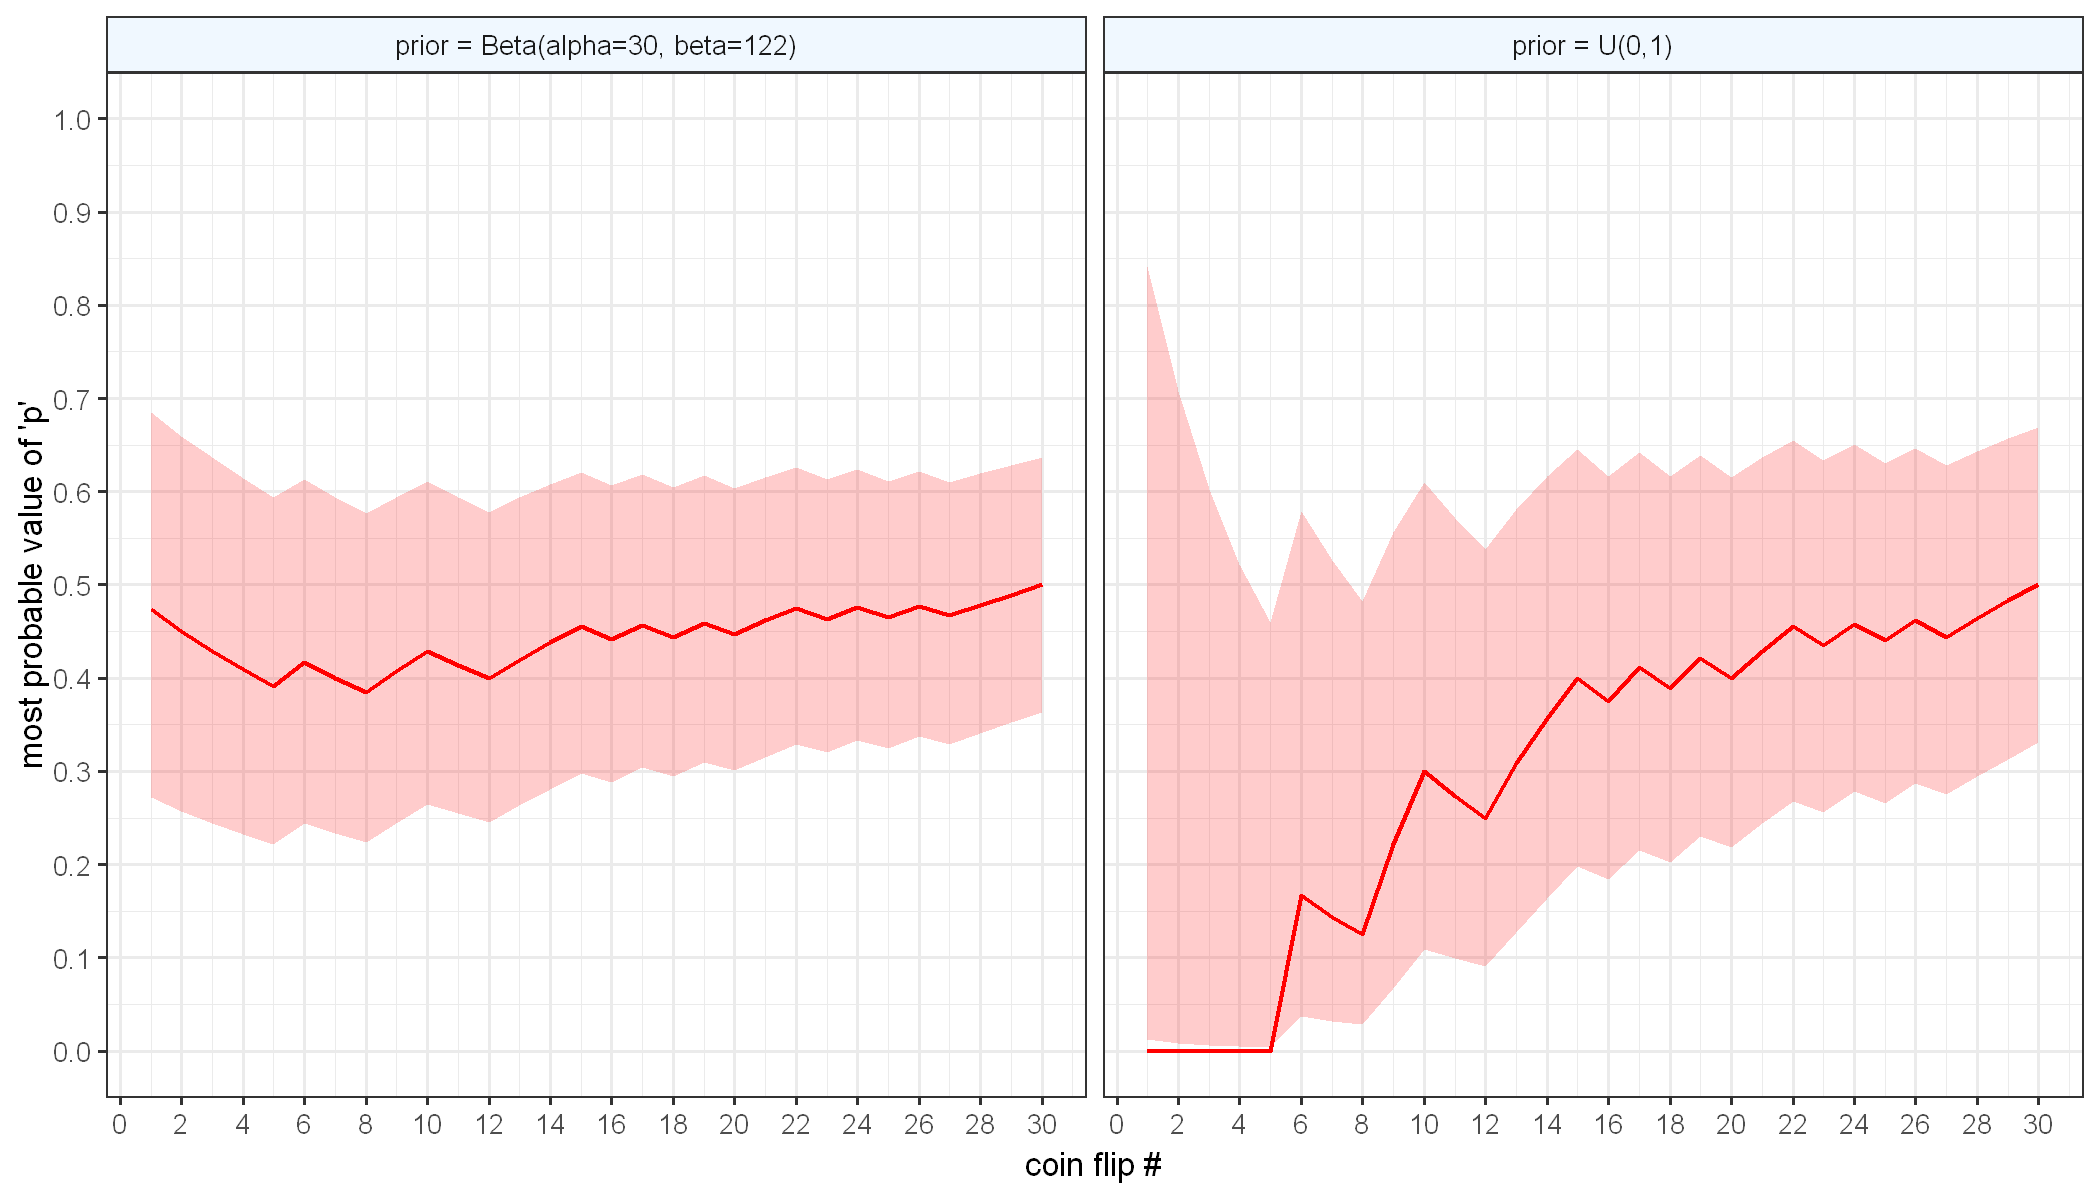

In [18]:
# plot results regarding sequential analysis
ggplot(data=sequential_tbl, aes(x=flip)) +
    geom_line(aes(y=mpv), colour='red') +
    geom_ribbon(aes(ymin=lower, ymax=upper), alpha=.2, fill='red') +
    scale_x_continuous(n.breaks=16) +
    scale_y_continuous(n.breaks=11, limits=c(0,1)) +
    xlab('coin flip #') +
    ylab("most probable value of 'p'") +
    facet_wrap(vars(prior_type), labeller=as_labeller(c(unif='prior = U(0,1)', beta=str_glue('prior = Beta(alpha={alpha}, beta={beta})')))) +
    theme(
        legend.background = element_rect(colour='black'),
        legend.margin     = margin(t=-3.5, r=6.5, b=.5, l=.5),
        legend.title      = element_blank(),
        legend.position   = c(.9, .8),
        strip.background  = element_rect(fill="aliceblue"))

<a id='sec4.D'></a>
### **4.D** Do you get a different result by analyzing the data sequentially with respect to a one-step analysis (i.e. considering all the data as a whole)?

In [19]:
cat('Results of the ONE-STEP analysis:')
one.step_tbl

cat('\nResults of the SEQUENTIAL analysis:')
sequential_tbl %>% filter(flip == max(flip))

Results of the ONE-STEP analysis:

prior_type,mpv,lower,upper
<chr>,<dbl>,<dbl>,<dbl>
unif,0.5,0.33061,0.66939
beta,0.5,0.36338,0.63662



Results of the SEQUENTIAL analysis:

flip,prior_type,mpv,lower,upper
<int>,<chr>,<dbl>,<dbl>,<dbl>
30,unif,0.5,0.33061,0.66939
30,beta,0.5,0.36338,0.63662


As expected, the ***one-step*** and ***sequential*** approaches lead to the same results.